In [139]:
import gym
from copy import copy
import numpy as np
import matplotlib.pyplot as plt

In [43]:
env = gym.make("MountainCar-v0").env

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [144]:
max_steps = 3000
max_agents = 100
populations_count = 20
games_count = 3
top_rate = 0.1

In [145]:
agents = [np.random.randint(0,3,max_steps) for _ in range(max_agents)]

In [146]:
def crossing_over(first, second):
    from_whom = np.random.randint(0,2,max_steps)
    return np.where(from_whom, first, second)
    
def mutate(agent, mutation_rate=0.9, mutation_chance=0.5):
    agent = agent.copy()
    if np.random.uniform() > mutation_chance:
        mutation_indexes = np.random.randint(0, max_steps, int(mutation_rate * max_steps))
        agent[mutation_indexes] = np.random.randint(0, 3, len(mutation_indexes))    
    return agent

-184.0


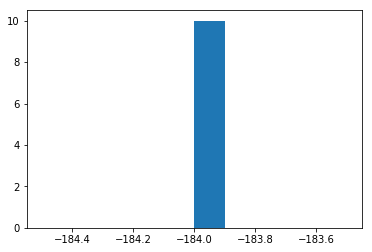

-184.0


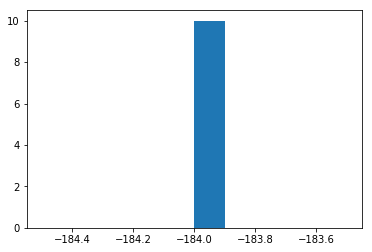

-184.0


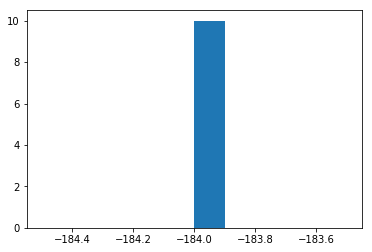

-184.0


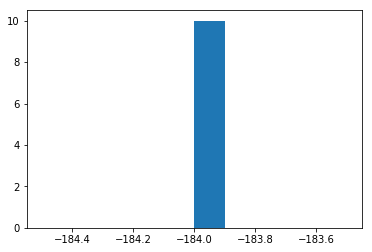

-184.0


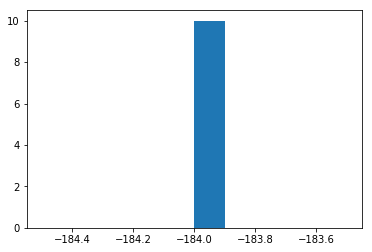

-184.0


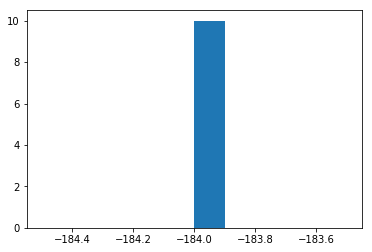

-184.0


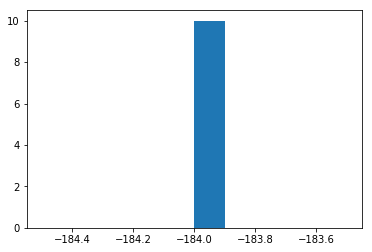

-184.0


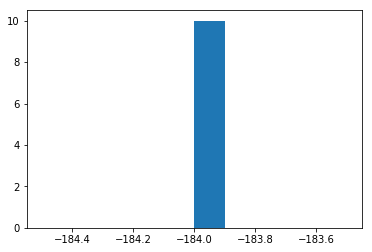

-184.0


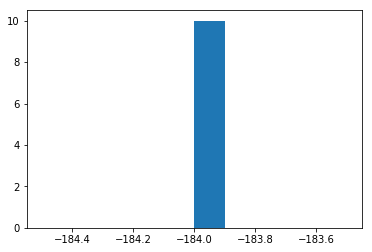

-184.0


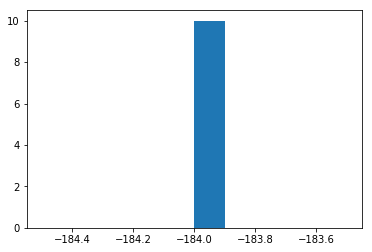

-184.0


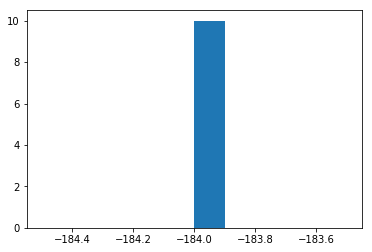

-184.0


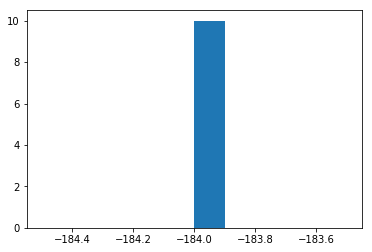

-184.0


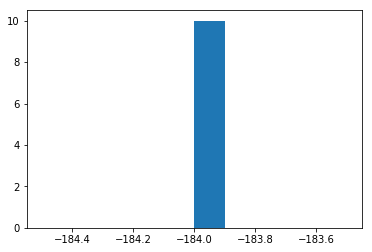

-184.0


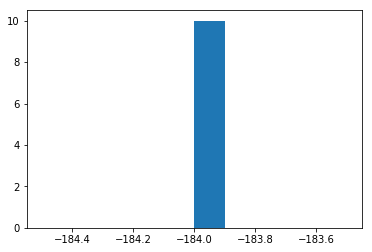

-184.0


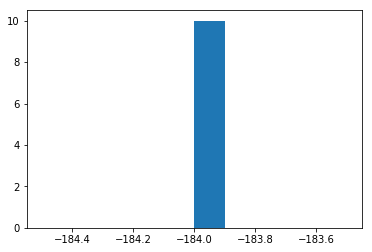

-184.0


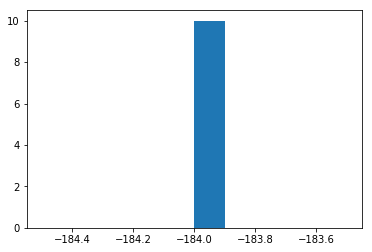

-184.0


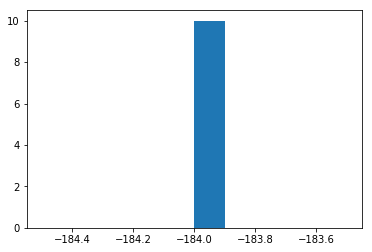

-184.0


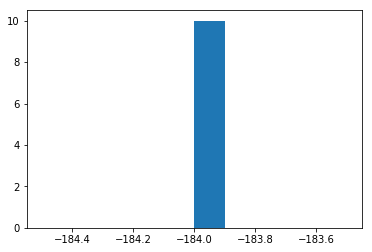

-184.0


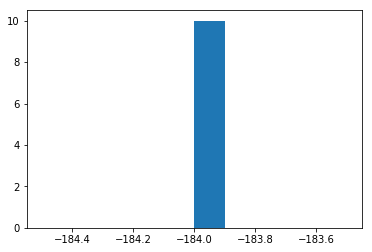

-184.0


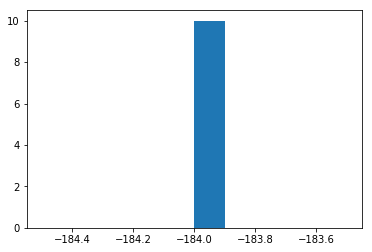

In [150]:
for pupulation_i in range(populations_count):
    agent2reward = []
    for agent in agents:
        for game in range(games_count):
            env.reset()
            agent_reward = 0

            for t in range(max_steps):
                obs, r, done, _ = env.step(agent[t])
                agent_reward += r
                if done:
                    break
            agent2reward.append((agent, agent_reward / games_count))
    
    elite_agents_tuples = sorted(agent2reward, key = lambda a: -a[1])[:int(top_rate * max_agents)]
    print(elite_agents_tuples[0][-1])
    elite_agents = [agent for agent, reward in elite_agents_tuples]
    elite_rewards = [reward for agent, reward in elite_agents_tuples]
    plt.hist(elite_rewards)
    plt.show()
    
    agents_new = [] 
    for _ in range(max_agents - len(elite_agents)):
        first_i, second_i = np.random.randint(0, len(elite_agents), 2)
        child = crossing_over(elite_agents[first_i], elite_agents[second_i])
        child = mutate(child)
        agents_new.append(child)
    agents_new += elite_agents
    agents = agents_new[:]


In [163]:
s = elite_agents[9]
s

array([1, 1, 0, ..., 1, 0, 0])

In [164]:
env.reset()
for t in range(len(s)):  
    env.step(s[i])
    env.render()